# data analysis using pandas library 

In [73]:
#opening the dataset to see the first 10 rows

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
dataFile=pd.read_csv('data_records.csv')

dataFile.head(100)

,Learner gender,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled
0,Male,Male,44,NO,NO,YES,NO,Google search,Model A,NO
1,Female,Female,43,YES,NO,YES,NO,YouTube,Model C,YES
2,Female,Female,56,YES,YES,YES,NO,Google search,Model A,YES
3,Male,Male,52,NO,NO,YES,NO,Google search,Model A,YES
4,Female,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES
...,...,...,...,...,...,...,...,...,...,...
95,Female,Female,57,YES,YES,NO,YES,Google search,Model A,YES
96,Female,Female,59,YES,NO,YES,NO,Books,Model B,YES
97,Female,Female,64,YES,YES,YES,YES,peer to peer,Model B,YES
98,Male,Female,28,NO,YES,NO,YES,Books,Model B,YES


In [74]:
#finding a small infomation about dataset

dataFile.describe()

,Teachers Age
count,1000.000000
mean,44.680000
std,12.216171
min,24.000000
25%,34.000000
50%,45.000000
75%,55.000000
max,65.000000


In [75]:
#finding the average Age for teachers in Stem subjects  

dataFile["Teachers Age"].mean()

44.68

In [76]:
# changin learner gender from categorical to numeric for analysis to be simple

dummy=pd.get_dummies(dataFile['Learner gender'])

In [77]:
dummy.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [78]:
#concatinate the numeric gender column into our dataset

dataFile2=pd.concat((dataFile,dummy),axis=1)

In [79]:
dataFile2.head()

,Learner gender,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,Female,Male
0,Male,Male,44,NO,NO,YES,NO,Google search,Model A,NO,0,1
1,Female,Female,43,YES,NO,YES,NO,YouTube,Model C,YES,1,0
2,Female,Female,56,YES,YES,YES,NO,Google search,Model A,YES,1,0
3,Male,Male,52,NO,NO,YES,NO,Google search,Model A,YES,0,1
4,Female,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES,1,0


In [80]:
# droping a learner gender categorical column from dataset

dataFile2=dataFile2.drop(['Learner gender'],axis=1)

In [81]:
dataFile2.head()

,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,Female,Male
0,Male,44,NO,NO,YES,NO,Google search,Model A,NO,0,1
1,Female,43,YES,NO,YES,NO,YouTube,Model C,YES,1,0
2,Female,56,YES,YES,YES,NO,Google search,Model A,YES,1,0
3,Male,52,NO,NO,YES,NO,Google search,Model A,YES,0,1
4,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES,1,0


In [82]:
#droping female from dataset since it is also represented in male column as 0 and male as 1

dataFile2=dataFile2.drop(['Female'],axis=1)

In [83]:
dataFile2.head()

,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,Male
0,Male,44,NO,NO,YES,NO,Google search,Model A,NO,1
1,Female,43,YES,NO,YES,NO,YouTube,Model C,YES,0
2,Female,56,YES,YES,YES,NO,Google search,Model A,YES,0
3,Male,52,NO,NO,YES,NO,Google search,Model A,YES,1
4,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES,0


In [84]:
#renaming male column back to learner gender since male=1 and female=0, ....to avoid confution 

dataFile2=dataFile2.rename(columns={"Male":"learner gender"})

In [85]:
dataFile2.head()

,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender
0,Male,44,NO,NO,YES,NO,Google search,Model A,NO,1
1,Female,43,YES,NO,YES,NO,YouTube,Model C,YES,0
2,Female,56,YES,YES,YES,NO,Google search,Model A,YES,0
3,Male,52,NO,NO,YES,NO,Google search,Model A,YES,1
4,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES,0


In [86]:
dummy2=pd.get_dummies(dataFile2['Community Outreach'])

In [87]:
dummy2.head()

,NO,YES
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1


In [88]:
dataFile3=pd.concat((dataFile2,dummy2),axis=1)

In [89]:
dataFile3.head()

,Teachers Gender,Teachers Age,Community Outreach,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender,NO,YES
0,Male,44,NO,NO,YES,NO,Google search,Model A,NO,1,1,0
1,Female,43,YES,NO,YES,NO,YouTube,Model C,YES,0,0,1
2,Female,56,YES,YES,YES,NO,Google search,Model A,YES,0,0,1
3,Male,52,NO,NO,YES,NO,Google search,Model A,YES,1,1,0
4,Female,59,YES,NO,YES,YES,Teachers explanation,Model A,YES,0,0,1


In [90]:
dataFile3=dataFile3.drop(['Community Outreach'],axis=1)

In [91]:
dataFile3.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender,NO,YES
0,Male,44,NO,YES,NO,Google search,Model A,NO,1,1,0
1,Female,43,NO,YES,NO,YouTube,Model C,YES,0,0,1
2,Female,56,YES,YES,NO,Google search,Model A,YES,0,0,1
3,Male,52,NO,YES,NO,Google search,Model A,YES,1,1,0
4,Female,59,NO,YES,YES,Teachers explanation,Model A,YES,0,0,1


In [92]:
dataFile3=dataFile3.drop(['NO'],axis=1)


In [93]:
dataFile3.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender,YES
0,Male,44,NO,YES,NO,Google search,Model A,NO,1,0
1,Female,43,NO,YES,NO,YouTube,Model C,YES,0,1
2,Female,56,YES,YES,NO,Google search,Model A,YES,0,1
3,Male,52,NO,YES,NO,Google search,Model A,YES,1,0
4,Female,59,NO,YES,YES,Teachers explanation,Model A,YES,0,1


In [94]:
dataFile3=dataFile3.rename(columns={"YES":"Community Outreach"})

In [95]:
dataFile3.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender,Community Outreach
0,Male,44,NO,YES,NO,Google search,Model A,NO,1,0
1,Female,43,NO,YES,NO,YouTube,Model C,YES,0,1
2,Female,56,YES,YES,NO,Google search,Model A,YES,0,1
3,Male,52,NO,YES,NO,Google search,Model A,YES,1,0
4,Female,59,NO,YES,YES,Teachers explanation,Model A,YES,0,1


In [96]:
dummy3=pd.get_dummies(dataFile2['Enrolled'])

In [97]:
dummy3.head()

,NO,YES
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [98]:
dataFile4=pd.concat((dataFile3,dummy3),axis=1)

In [99]:
dataFile4.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,Enrolled,learner gender,Community Outreach,NO,YES
0,Male,44,NO,YES,NO,Google search,Model A,NO,1,0,1,0
1,Female,43,NO,YES,NO,YouTube,Model C,YES,0,1,0,1
2,Female,56,YES,YES,NO,Google search,Model A,YES,0,1,0,1
3,Male,52,NO,YES,NO,Google search,Model A,YES,1,0,0,1
4,Female,59,NO,YES,YES,Teachers explanation,Model A,YES,0,1,0,1


In [100]:
dataFile4=dataFile4.drop(['Enrolled'],axis=1)


In [101]:
dataFile4=dataFile4.drop(['NO'],axis=1)

In [102]:
dataFile4.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,learner gender,Community Outreach,YES
0,Male,44,NO,YES,NO,Google search,Model A,1,0,0
1,Female,43,NO,YES,NO,YouTube,Model C,0,1,1
2,Female,56,YES,YES,NO,Google search,Model A,0,1,1
3,Male,52,NO,YES,NO,Google search,Model A,1,0,1
4,Female,59,NO,YES,YES,Teachers explanation,Model A,0,1,1


In [103]:
dataFile4=dataFile4.rename(columns={"YES":"Enrolled"})

In [104]:
dataFile4.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,learner gender,Community Outreach,Enrolled
0,Male,44,NO,YES,NO,Google search,Model A,1,0,0
1,Female,43,NO,YES,NO,YouTube,Model C,0,1,1
2,Female,56,YES,YES,NO,Google search,Model A,0,1,1
3,Male,52,NO,YES,NO,Google search,Model A,1,0,1
4,Female,59,NO,YES,YES,Teachers explanation,Model A,0,1,1


In [105]:
dummy4=pd.get_dummies(dataFile3['has access to internet at home'])
dummy4.head()

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [106]:
dataFile5=pd.concat((dataFile4,dummy4),axis=1)
dataFile5.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,has access to internet at home,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,NO,YES
0,Male,44,NO,YES,NO,Google search,Model A,1,0,0,1,0
1,Female,43,NO,YES,NO,YouTube,Model C,0,1,1,1,0
2,Female,56,YES,YES,NO,Google search,Model A,0,1,1,1,0
3,Male,52,NO,YES,NO,Google search,Model A,1,0,1,1,0
4,Female,59,NO,YES,YES,Teachers explanation,Model A,0,1,1,0,1


In [107]:
dataFile5=dataFile5.drop(['has access to internet at home'],axis=1)
dataFile5.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,NO,YES
0,Male,44,NO,YES,Google search,Model A,1,0,0,1,0
1,Female,43,NO,YES,YouTube,Model C,0,1,1,1,0
2,Female,56,YES,YES,Google search,Model A,0,1,1,1,0
3,Male,52,NO,YES,Google search,Model A,1,0,1,1,0
4,Female,59,NO,YES,Teachers explanation,Model A,0,1,1,0,1


In [108]:
dataFile5=dataFile5.drop(['NO'],axis=1)
dataFile5.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,YES
0,Male,44,NO,YES,Google search,Model A,1,0,0,0
1,Female,43,NO,YES,YouTube,Model C,0,1,1,0
2,Female,56,YES,YES,Google search,Model A,0,1,1,0
3,Male,52,NO,YES,Google search,Model A,1,0,1,0
4,Female,59,NO,YES,Teachers explanation,Model A,0,1,1,1


In [109]:
dataFile5=dataFile5.rename(columns={"YES":"has access to internet at home"})
dataFile5.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home
0,Male,44,NO,YES,Google search,Model A,1,0,0,0
1,Female,43,NO,YES,YouTube,Model C,0,1,1,0
2,Female,56,YES,YES,Google search,Model A,0,1,1,0
3,Male,52,NO,YES,Google search,Model A,1,0,1,0
4,Female,59,NO,YES,Teachers explanation,Model A,0,1,1,1


In [110]:
dummy5=pd.get_dummies(dataFile4['Know Career path'])
dummy5.head()

,NO,YES
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [111]:
dataFile6=pd.concat((dataFile5,dummy5),axis=1)
dataFile6.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,Know Career path,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,NO,YES
0,Male,44,NO,YES,Google search,Model A,1,0,0,0,0,1
1,Female,43,NO,YES,YouTube,Model C,0,1,1,0,0,1
2,Female,56,YES,YES,Google search,Model A,0,1,1,0,0,1
3,Male,52,NO,YES,Google search,Model A,1,0,1,0,0,1
4,Female,59,NO,YES,Teachers explanation,Model A,0,1,1,1,0,1


In [112]:
dataFile6=dataFile6.drop(['Know Career path'],axis=1)
dataFile6.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,NO,YES
0,Male,44,NO,Google search,Model A,1,0,0,0,0,1
1,Female,43,NO,YouTube,Model C,0,1,1,0,0,1
2,Female,56,YES,Google search,Model A,0,1,1,0,0,1
3,Male,52,NO,Google search,Model A,1,0,1,0,0,1
4,Female,59,NO,Teachers explanation,Model A,0,1,1,1,0,1


In [113]:
dataFile6=dataFile6.drop(['NO'],axis=1)
dataFile6.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,YES
0,Male,44,NO,Google search,Model A,1,0,0,0,1
1,Female,43,NO,YouTube,Model C,0,1,1,0,1
2,Female,56,YES,Google search,Model A,0,1,1,0,1
3,Male,52,NO,Google search,Model A,1,0,1,0,1
4,Female,59,NO,Teachers explanation,Model A,0,1,1,1,1


In [114]:
dataFile6=dataFile6.rename(columns={"YES":"know career path"})
dataFile6.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path
0,Male,44,NO,Google search,Model A,1,0,0,0,1
1,Female,43,NO,YouTube,Model C,0,1,1,0,1
2,Female,56,YES,Google search,Model A,0,1,1,0,1
3,Male,52,NO,Google search,Model A,1,0,1,0,1
4,Female,59,NO,Teachers explanation,Model A,0,1,1,1,1


In [115]:
dummy6=pd.get_dummies(dataFile5['Next of kin has a degree'])
dummy6.head()

,NO,YES
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [116]:
dataFile7=pd.concat((dataFile6,dummy6),axis=1)
dataFile7.head()

,Teachers Gender,Teachers Age,Next of kin has a degree,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,NO,YES
0,Male,44,NO,Google search,Model A,1,0,0,0,1,1,0
1,Female,43,NO,YouTube,Model C,0,1,1,0,1,1,0
2,Female,56,YES,Google search,Model A,0,1,1,0,1,0,1
3,Male,52,NO,Google search,Model A,1,0,1,0,1,1,0
4,Female,59,NO,Teachers explanation,Model A,0,1,1,1,1,1,0


In [117]:
dataFile7=dataFile7.drop(['Next of kin has a degree'],axis=1)
dataFile7.head()

,Teachers Gender,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,NO,YES
0,Male,44,Google search,Model A,1,0,0,0,1,1,0
1,Female,43,YouTube,Model C,0,1,1,0,1,1,0
2,Female,56,Google search,Model A,0,1,1,0,1,0,1
3,Male,52,Google search,Model A,1,0,1,0,1,1,0
4,Female,59,Teachers explanation,Model A,0,1,1,1,1,1,0


In [118]:
dataFile7=dataFile7.drop(['NO'],axis=1)
dataFile7.head()

,Teachers Gender,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,YES
0,Male,44,Google search,Model A,1,0,0,0,1,0
1,Female,43,YouTube,Model C,0,1,1,0,1,0
2,Female,56,Google search,Model A,0,1,1,0,1,1
3,Male,52,Google search,Model A,1,0,1,0,1,0
4,Female,59,Teachers explanation,Model A,0,1,1,1,1,0


In [119]:
dataFile7=dataFile7.rename(columns={"YES":"next of kin has a degree"})
dataFile7.head()

,Teachers Gender,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree
0,Male,44,Google search,Model A,1,0,0,0,1,0
1,Female,43,YouTube,Model C,0,1,1,0,1,0
2,Female,56,Google search,Model A,0,1,1,0,1,1
3,Male,52,Google search,Model A,1,0,1,0,1,0
4,Female,59,Teachers explanation,Model A,0,1,1,1,1,0


In [120]:
dummy7=pd.get_dummies(dataFile5['Teachers Gender'])
dummy7.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [121]:
dataFile8=pd.concat((dataFile7,dummy7),axis=1)
dataFile8.head()

,Teachers Gender,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,Female,Male
0,Male,44,Google search,Model A,1,0,0,0,1,0,0,1
1,Female,43,YouTube,Model C,0,1,1,0,1,0,1,0
2,Female,56,Google search,Model A,0,1,1,0,1,1,1,0
3,Male,52,Google search,Model A,1,0,1,0,1,0,0,1
4,Female,59,Teachers explanation,Model A,0,1,1,1,1,0,1,0


In [122]:
dataFile8=dataFile8.drop(['Teachers Gender'],axis=1)
dataFile8.head()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,Female,Male
0,44,Google search,Model A,1,0,0,0,1,0,0,1
1,43,YouTube,Model C,0,1,1,0,1,0,1,0
2,56,Google search,Model A,0,1,1,0,1,1,1,0
3,52,Google search,Model A,1,0,1,0,1,0,0,1
4,59,Teachers explanation,Model A,0,1,1,1,1,0,1,0


In [123]:
dataFile8=dataFile8.drop(['Male'],axis=1)
dataFile8.head()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,Female
0,44,Google search,Model A,1,0,0,0,1,0,0
1,43,YouTube,Model C,0,1,1,0,1,0,1
2,56,Google search,Model A,0,1,1,0,1,1,1
3,52,Google search,Model A,1,0,1,0,1,0,0
4,59,Teachers explanation,Model A,0,1,1,1,1,0,1


In [124]:
dataFile8=dataFile8.rename(columns={"Female":"teachers gender"})
dataFile8.head()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,teachers gender
0,44,Google search,Model A,1,0,0,0,1,0,0
1,43,YouTube,Model C,0,1,1,0,1,0,1
2,56,Google search,Model A,0,1,1,0,1,1,1
3,52,Google search,Model A,1,0,1,0,1,0,0
4,59,Teachers explanation,Model A,0,1,1,1,1,0,1


In [125]:
# features available in the dataset

print(dataFile8.columns.values)

['Teachers Age' 'learning material preferred' 'type of school'
 'learner gender' 'Community Outreach' 'Enrolled'
 'has access to internet at home' 'know career path'
 'next of kin has a degree' 'teachers gender']


In [126]:
dataFile8.describe()

,Teachers Age,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,teachers gender
count,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,44.680000,0.47300,0.50000,0.504000,0.497000,0.515000,0.52000,0.482000
std,12.216171,0.49952,0.50025,0.500234,0.500241,0.500025,0.49985,0.499926
min,24.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,34.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,0.00000,0.50000,1.000000,0.000000,1.000000,1.00000,0.000000
75%,55.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000
max,65.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


In [127]:
dataFile8.describe(include=['O'])

,learning material preferred,type of school
count,1000,1000
unique,5,3
top,Books,Model A
freq,221,347


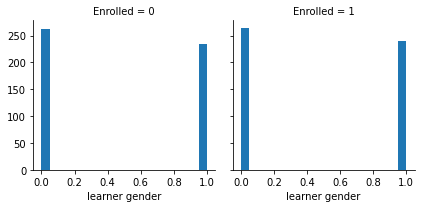

In [169]:
dataFile8 = sns.FacetGrid(dataFile8,col='Enrolled')
dataFile8.map(plt.hist, 'learner gender', bins=20)

In [ ]:
dataFile8[['learner gender', 'Enrolled']].groupby(['learner gender'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,learner gender,Enrolled
1,1,0.505285
0,0,0.502846


In [ ]:
dataFile8[['Community Outreach', 'Enrolled']].groupby(['Community Outreach'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,Community Outreach,Enrolled
1,1,0.508
0,0,0.500


In [ ]:
dataFile8[['has access to internet at home', 'Enrolled']].groupby(['has access to internet at home'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,has access to internet at home,Enrolled
0,0,0.522863
1,1,0.484909


In [ ]:
dataFile8[['know career path', 'Enrolled']].groupby(['know career path'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,know career path,Enrolled
1,1,0.512621
0,0,0.494845


In [ ]:
dataFile8[['next of kin has a degree', 'Enrolled']].groupby(['next of kin has a degree'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,next of kin has a degree,Enrolled
1,1,0.505769
0,0,0.502083


In [ ]:
dataFile8[['teachers gender', 'Enrolled']].groupby(['teachers gender'], as_index=False).mean().sort_values(by='Enrolled', ascending=False)

,teachers gender,Enrolled
1,1,0.510373
0,0,0.498069


# spliting dataset into a train and test data

In [ ]:
Y=dataFile8['Enrolled']

In [ ]:
print(Y)

0      0
1      1
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: Enrolled, Length: 1000, dtype: uint8


In [ ]:
X=dataFile8.drop(['Enrolled'],axis=1)

In [ ]:
X.head()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,has access to internet at home,know career path,next of kin has a degree,teachers gender
0,44,Google search,Model A,1,0,0,1,0,0
1,43,YouTube,Model C,0,1,0,1,0,1
2,56,Google search,Model A,0,1,0,1,1,1
3,52,Google search,Model A,1,0,0,1,0,0
4,59,Teachers explanation,Model A,0,1,1,1,0,1


In [ ]:
 from sklearn.model_selection import train_test_split

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 9) (800, 9) (200, 9)


In [ ]:
print(Y.shape,y_train.shape,y_test.shape)

(1000,) (800,) (200,)


In [ ]:
dataFile8.head()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,teachers gender
0,44,Google search,Model A,1,0,0,0,1,0,0
1,43,YouTube,Model C,0,1,1,0,1,0,1
2,56,Google search,Model A,0,1,1,0,1,1,1
3,52,Google search,Model A,1,0,1,0,1,0,0
4,59,Teachers explanation,Model A,0,1,1,1,1,0,1


In [ ]:
dataFile8.tail()

,Teachers Age,learning material preferred,type of school,learner gender,Community Outreach,Enrolled,has access to internet at home,know career path,next of kin has a degree,teachers gender
995,57,Books,Model B,0,0,1,1,1,0,0
996,32,Google search,Model C,1,0,0,0,0,1,0
997,55,Books,Model A,0,1,0,0,0,1,0
998,44,Books,Model C,0,0,1,0,0,0,0
999,36,Google search,Model B,0,1,1,0,0,0,0


# Now we are ready to train a model and predict the required solution

In [ ]:
from sklearn.linear_model import LogisticRegression